In [1]:
# libraries 
import os
import glob
import fnmatch
import pandas as pd 
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import scipy.io
import scipy.io.wavfile
import tensorflow as tf
import wave
# libraries for training models
#import keras

from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv1D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import Input, add, Flatten, Dense, BatchNormalization, Dropout, LSTM, GRU
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D, Activation, LeakyReLU, ReLU

from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

Path 

In [2]:
path = 'C:\\Users\\markereversey\\Desktop/project-AI/Heartbeat_Sound'
print(os.listdir(path))

['artifact', 'extrahls', 'extrastole', 'murmur', 'normal', 'unlabel']


In [143]:
# setting path to the folder 
train_data = path
unlabel_data = path + '/unlabel/'
normal_data = path + '/normal/'
murmur_data = path + '/murmur/'
extrastole_data = path + '/extrastole/'
artifact_data = path + '/artifact/'
extrahls_data = path + '/extrahls/'
print('Files  \t\t   Length\n','-'*25)

print(f'Normal files:{len(os.listdir(normal_data)):>10}')
print(f'Murmur files:{len(os.listdir(murmur_data)):>10}')
print(f'Extrastole files:{len(os.listdir(extrastole_data)):>5}')
print(f'Artifact files:{len(os.listdir(artifact_data)):>7}')
print(f'Exthrahls files:{len(os.listdir(extrahls_data)):>6}')
print(f'Unlabel files:{len(os.listdir(unlabel_data)):>9}')

Files  		   Length
 -------------------------
Normal files:       351
Murmur files:       129
Extrastole files:   46
Artifact files:     40
Exthrahls files:    19
Unlabel files:      247


([<matplotlib.patches.Wedge at 0x232987c6f50>,
 [Text(-0.5098781582571872, 1.569243213696417, 'normal'),
  Text(-0.40776277782741904, -1.5988212898940481, 'murmur'),
  Text(1.0503837039080206, -1.2724755693389433, 'extrastole'),
  Text(1.5073501318262326, -0.6711151764663347, 'artifact'),
  Text(1.64141835395155, -0.16806483067847702, 'extrahls')],
 [Text(-0.2781153590493748, 0.8559508438344091, '60%'),
  Text(-0.22241606063313762, -0.8720843399422079, '22%'),
  Text(0.5729365657680111, -0.6940775832757872, '8%'),
  Text(0.8221909809961266, -0.3660628235270916, '7%'),
  Text(0.8953191021553907, -0.09167172582462382, '3%')])

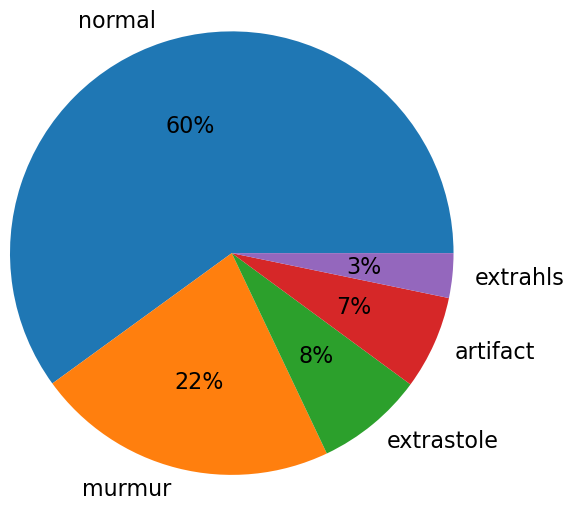

In [4]:
# EDA and Visualization

x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])

labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']

plt.pie(x, labels=labels, autopct='%.0f%%', radius=1.5, textprops={'fontsize':16})

In [111]:
import os
import numpy as np
import soundfile as sf

def generate_noise(audio_length, samplerate):
    # สร้างเสียงรบกวนแบบสุ่ม
    num_samples = int(audio_length * samplerate)
    noise = np.random.normal(scale=0.1, size=num_samples)  # สร้างเสียงรบกวนที่มีความสูงเฉลี่ย 0 และความแปรปรวน 0.1
    
    return noise


def add_noise_to_audio_folder(audio_folder, output_folder, noise_level=0.1, num_files=10):
    # สร้างโฟลเดอร์ใหม่
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # ลูปผ่านไฟล์เสียงในโฟลเดอร์
    for audio_file in os.listdir(audio_folder):
        if audio_file.endswith(".wav"):
            # อ่านไฟล์เสียงหลัก
            audio_path = os.path.join(audio_folder, audio_file)
            audio_data, samplerate = sf.read(audio_path)
            
            # สร้างเสียงรบกวนที่มีความยาวเท่ากับเสียงหลัก
            noise = generate_noise(len(audio_data) / samplerate, samplerate)
            
            # ปรับขนาดของเสียงรบกวนให้เท่ากับขนาดของเสียงหลัก
            if len(noise) != len(audio_data):
                noise = np.resize(noise, len(audio_data))
            
            # เพิ่มเสียงรบกวนเข้าไปในเสียงหลักและบันทึกไฟล์เสียงที่เพิ่มเสียงรบกวนแล้ว
            for i in range(num_files):
                noisy_audio = audio_data + noise * noise_level
                output_file = os.path.join(output_folder, f"{os.path.splitext(audio_file)[0]}_noisy_{i}.wav")
                sf.write(output_file, noisy_audio, samplerate)


# ตัวอย่างการใช้งาน
audio_folder = normal_data
output_folder = "C:\\Users\\markereversey\\Desktop\\project-AI\\New_dataset\\noise_normal"
noise_duration = 10  # ระยะเวลาของเสียงรบกวน (วินาที)
noise_level = 0.1  # ระดับของเสียงรบกวน (ค่าความสูงของเสียงรบกวนที่จะเพิ่มเข้าไป)
num_files = 10  # จำนวนไฟล์ที่ต้องการสร้างเสียงรบกวนในแต่ละไฟล์เสียง

add_noise_to_audio_folder(audio_folder, output_folder, noise_level, num_files)


In [5]:
# any function to use in wav files


def random_sound (audio_class):
    random_sound = np.random.randint(0, len(os.listdir(audio_class)))
    sound_file = os.listdir(audio_class)[random_sound]
    sound_file_path = os.path.join(audio_class, sound_file)
    sound = os.listdir(audio_class)[random_sound]
    sound = audio_class + sound
    sound, sample_rate = librosa.load(sound)
    return ipd.Audio(sound, rate=sample_rate) , sound, sound_file_path

def plot_waveform_from_file(wav_file):
    with wave.open(wav_file, 'rb') as wf:
        num_frames = wf.getnframes()
        frame_rate = wf.getframerate()
        signal = wf.readframes(num_frames)
    signal = np.frombuffer(signal, dtype=np.int16)
    time = np.linspace(0, len(signal) / frame_rate, num=len(signal))
    filename = os.path.basename(wav_file)

    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.title(filename)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
    
def show_audio_spectrum (audio_sample):
    sample_rate = 22050
    fft_normal = np.fft.fft(audio_sample)
    magnitude_normal = np.abs(fft_normal)
    freq_normal = np.linspace(0, sample_rate, len(magnitude_normal))
    half_freq = freq_normal[:int(len(freq_normal)/2)]
    half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]
    
    plt.figure(figsize=(12, 8))
    plt.plot(half_freq, half_magnitude)
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.show()

def show_spectrogram (audio_sample):
    hop_length = 512
    n_fft = 2048
    sample_rate = 22050

    hop_length_duration = float(hop_length) / sample_rate
    n_fft_duration = float(n_fft) / sample_rate

    print(f'STFT hop length duration is : {hop_length_duration}')
    print(f'STFT window duration is : {n_fft_duration}')

    stft_normal = librosa.stft(audio_sample, n_fft=n_fft, hop_length=hop_length)
    
    # calculate abs value on complex nums to get magnitude
    spectrogram = np.abs(stft_normal)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    plt.figure(figsize=(15, 10))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel('time')
    plt.ylabel('frequency')
    plt.colorbar()
    plt.title('spectrogram')

# MFCCs

def show_mfcc_features (audio_sample) :
    hop_length = 512
    n_fft = 2048
    sample_rate = 22050
    sr = librosa.load(librosa.ex('libri1'))
    #MFCCs = librosa.feature.mfcc(audio_sample, n_fft=n_fft, hop_length=hop_length, n_mfcc=52)
    MFCCs = librosa.feature.mfcc(y=audio_sample, n_fft=n_fft, hop_length=hop_length, n_mfcc=52)
    #display MFCCs

    plt.figure(figsize=(15, 10))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel('time')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.colorbar()
    plt.title('MFCCs')
    plt.show()
    


In [37]:
normal_audio, normal_sample, normal_path = random_sound(normal_data)
artifact_audio, artifact_sample, artifact_path = random_sound(artifact_data)
murmur_audio, murmur_sample, murmur_path = random_sound(murmur_data)
extrahls_audio, extrahls_sample, extrahls_path = random_sound(extrahls_data)
extrastole_audio, extrastole_sample, extrastole_path = random_sound(extrastole_data)
normal_audio
unlabel_audio, unlabel_sample, unlabel_path = random_sound(unlabel_data)
#artifact_audio

# Show the result of file.wav

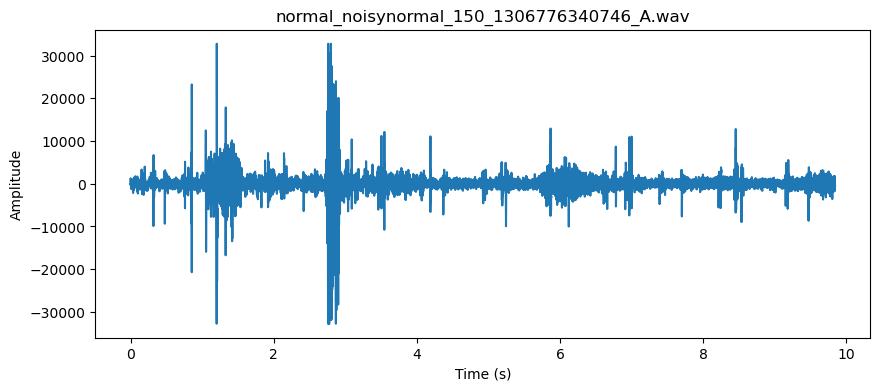

In [7]:
#normal_wav = random_sound_paths(normal_data)
plot_waveform_from_file(normal_path)

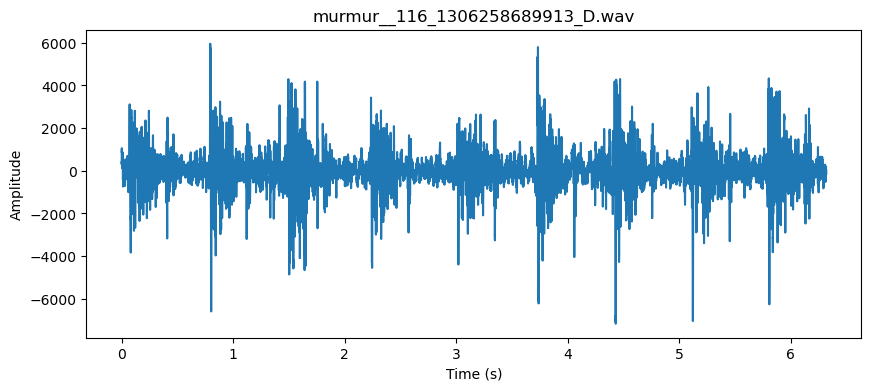

In [8]:
plot_waveform_from_file(murmur_path)

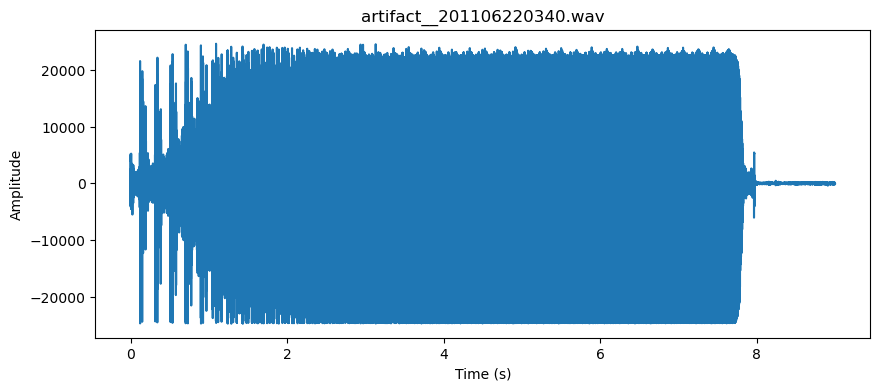

In [9]:
#artifact_wav = random_sound_paths(artifact_data)
plot_waveform_from_file(artifact_path)

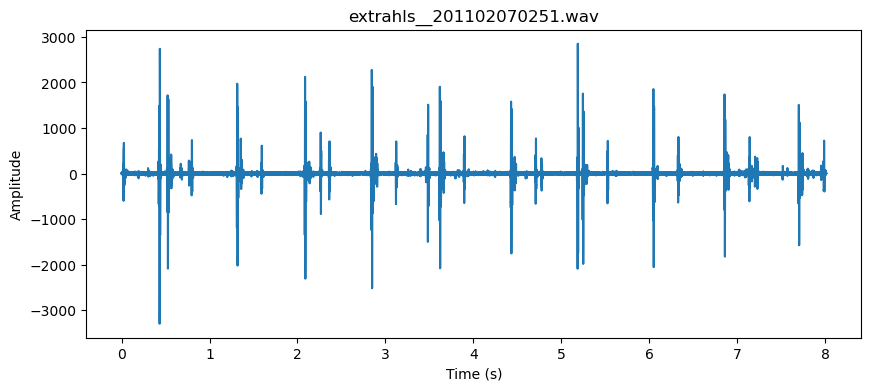

In [36]:
plot_waveform_from_file(extrahls_path)

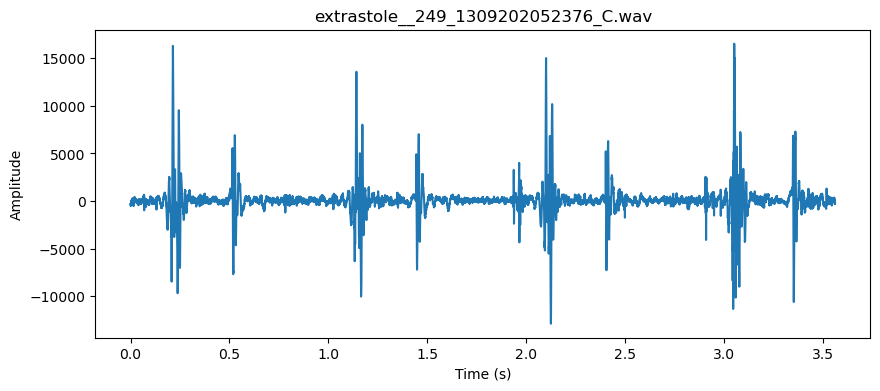

In [38]:
plot_waveform_from_file(extrastole_path)

# Show the result of spectrogram from file.wav

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


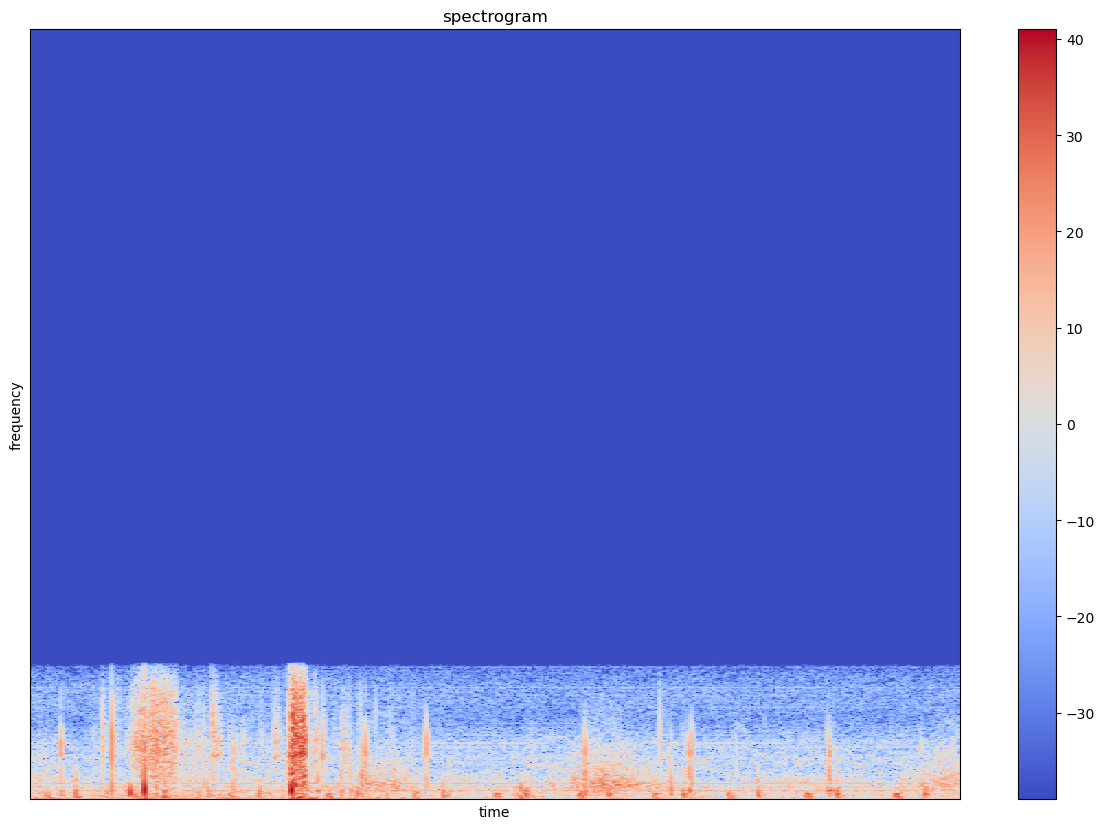

In [10]:
show_spectrogram(normal_sample)

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


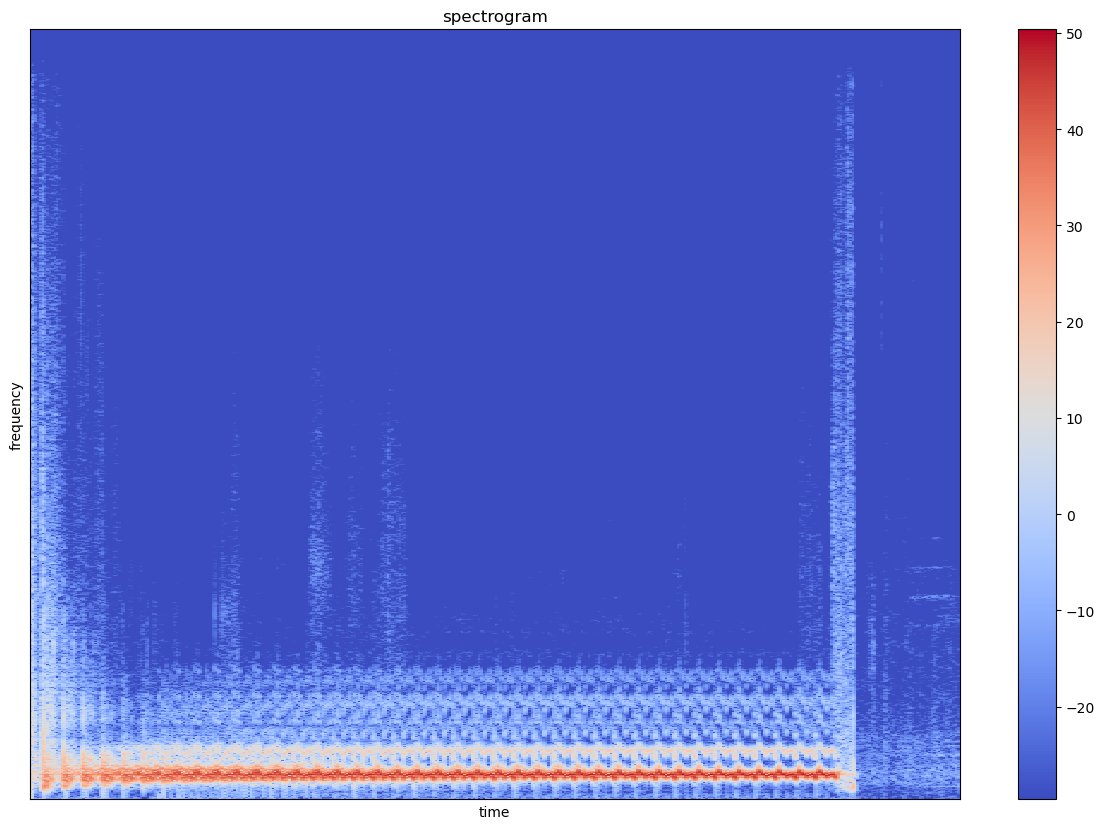

In [11]:
show_spectrogram(artifact_sample)

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


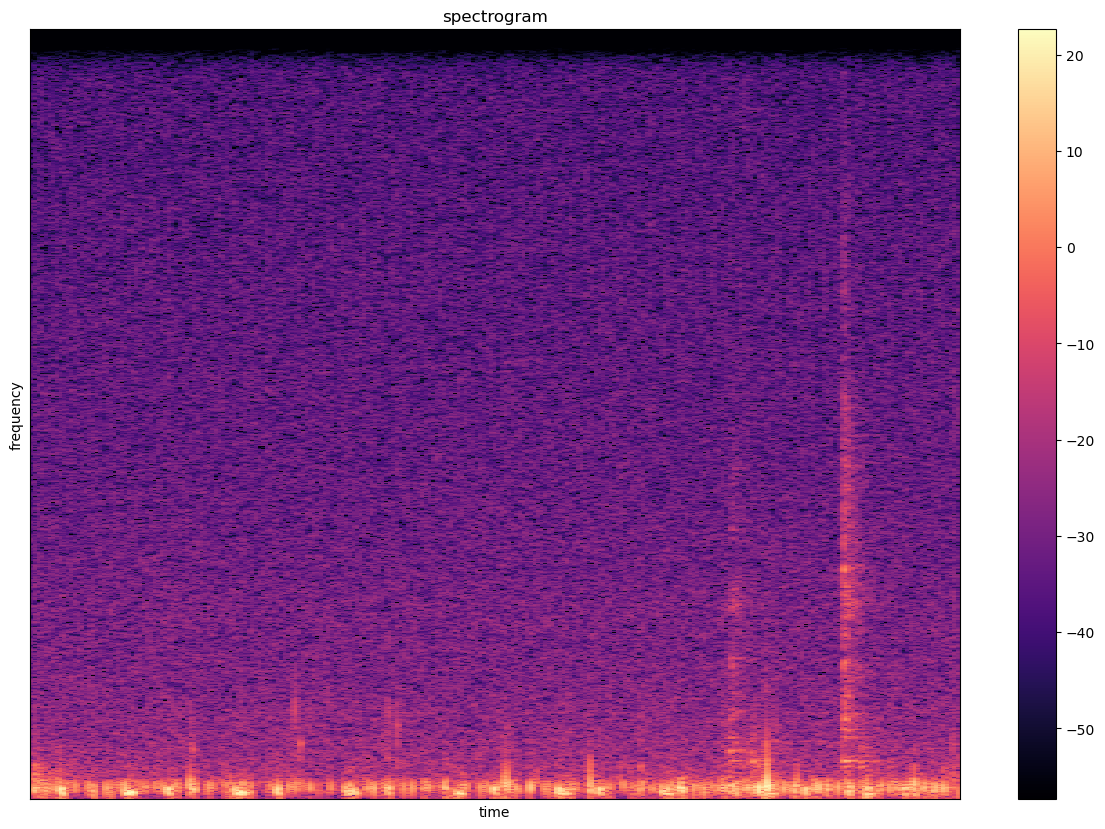

In [39]:
show_spectrogram(extrahls_sample)

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


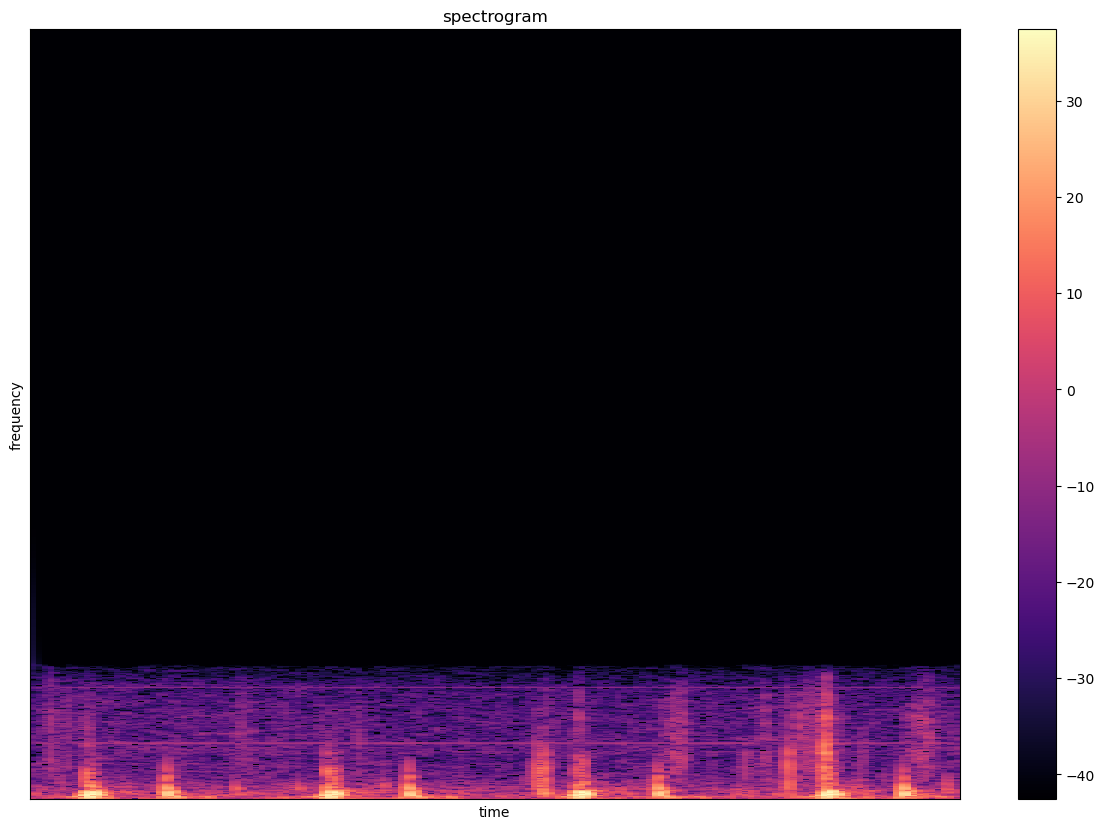

In [40]:
show_spectrogram(extrastole_sample)

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


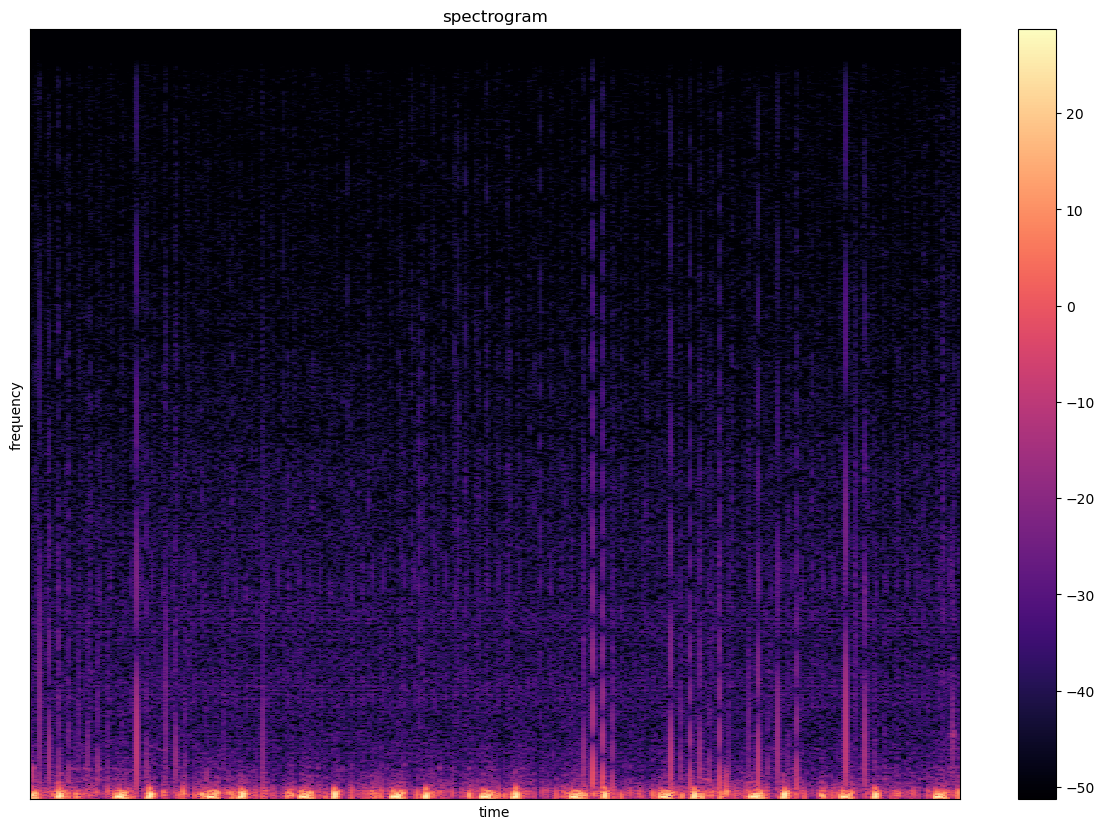

In [42]:
show_spectrogram(murmur_sample)

# show the result of mfcc from file.wav

c:\Users\markereversey\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


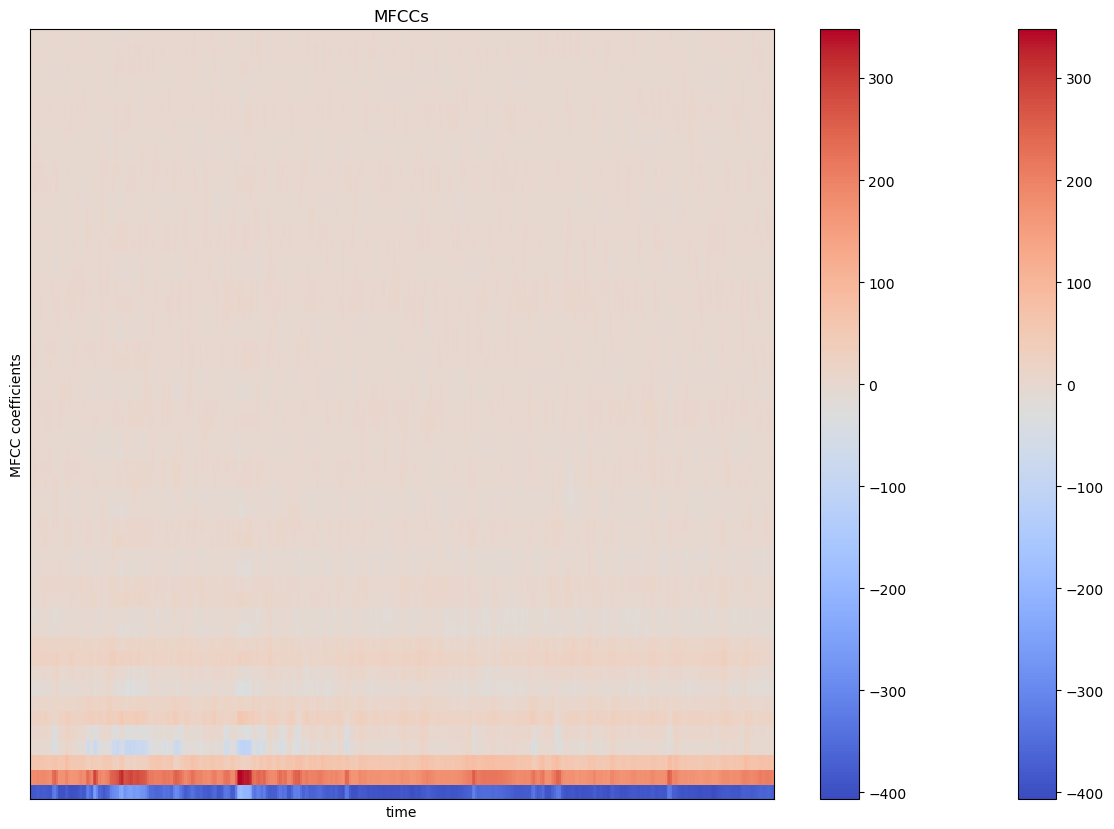

In [12]:
show_mfcc_features(normal_sample)

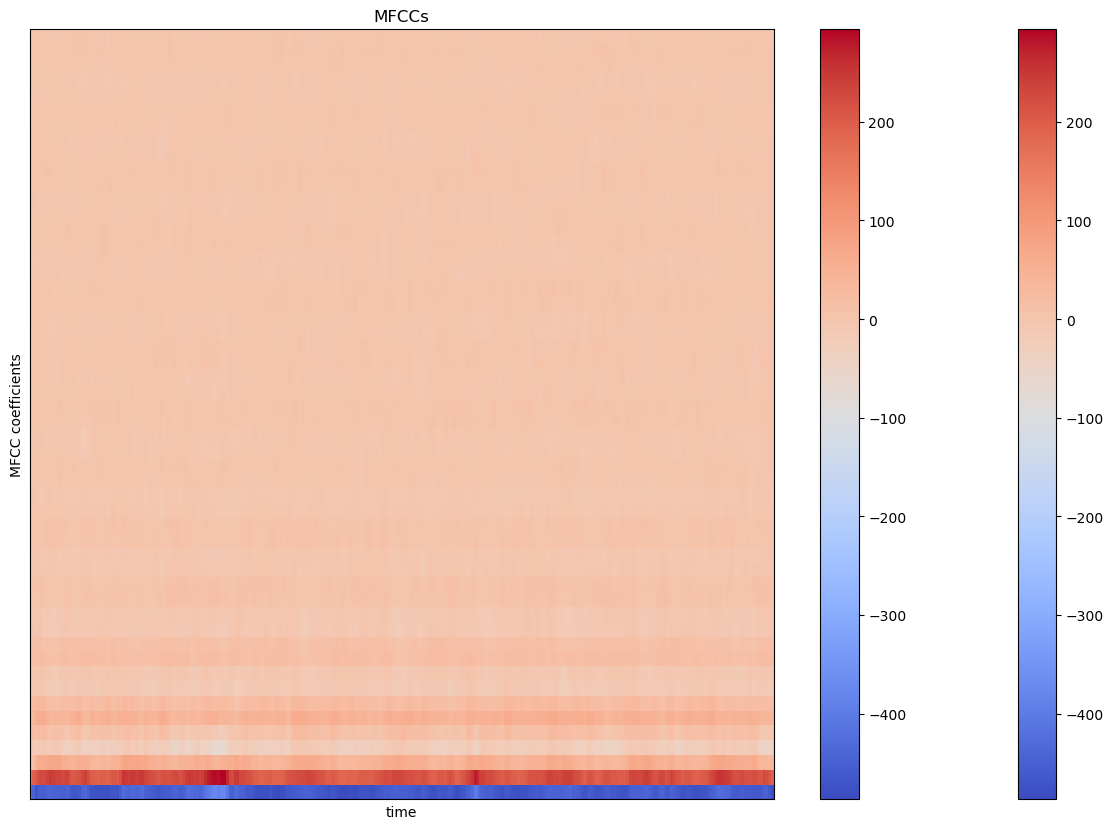

In [13]:
show_mfcc_features(murmur_sample)

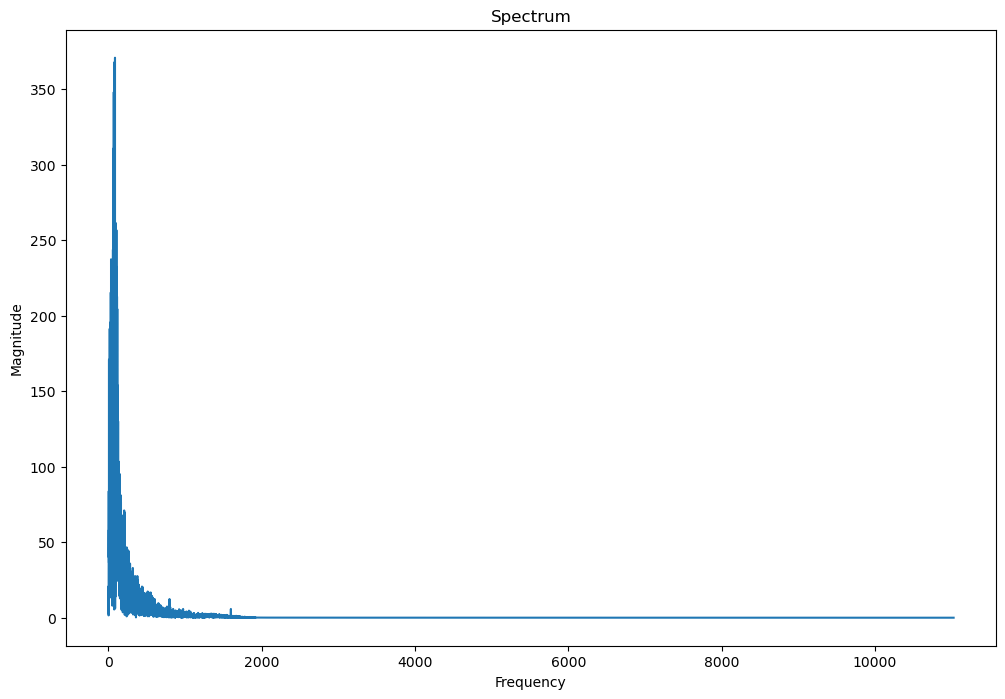

In [43]:
show_audio_spectrum(normal_sample)

# Data Preprocessing

In [14]:
def add_noise (data, x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift (data, x ) :
    return np.roll(data, x)

def stretch (data, rate):
    data = librosa.effects.time_stretch(data, rate=rate)
    return data 

def pitch_shift (data, rate):
    data = librosa.effects.pitch_shift(data, sr=22050, n_steps=rate)
    return data

In [15]:
def load_file_data (folder, file_names, duration=10, sr=22050):

    input_length = sr * duration
    features = 52
    data = []

    for file_name in file_names :
        try:
            sound_file = folder + file_name
            X, sr = librosa.load(sound_file, sr=sr, duration=duration)
            dur= librosa.get_duration(y=X, sr=sr)
            if ( round(dur) < duration):
                print('fixing audio lenght : ', file_name)
                X = librosa.util.fix_length(X, size=input_length)
            
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=features).T, axis=0)
            feature = np.array(mfccs).reshape([-1, 1])
            data.append(feature)
            stretch_data_1 = stretch(X, 0.8)
            mfccs_stretch_1 = np.mean(librosa.feature.mfcc(y=stretch_data_1, sr=sr, 
                                                        n_mfcc=features).T, axis=0)

            feature_1 = np.array(mfccs_stretch_1).reshape([-1, 1])
            data.append(feature_1)
            stretch_data_2 = stretch(X, 1.2)
            
            mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=stretch_data_2, sr=sr, 
                                                        n_mfcc=features).T, axis=0)
            feature_2 = np.array(mfccs_stretch_2).reshape([-1, 1])
            data.append(feature_2)
        except Exception as e:
            print('Error encountered while parsing file: ',file_name)


    return data

# Encoding

In [53]:
CLASSES = ['artifact', 'murmur', 'normal', 'extrastole', 'extrahls']

NB_CLASSES = len(CLASSES)

label_to_int = {k : v for v, k in enumerate(CLASSES)}
print(label_to_int,'\n')

int_to_label  = {v : k for k, v in label_to_int.items()}
print(int_to_label)




{'artifact': 0, 'murmur': 1, 'normal': 2, 'extrastole': 3, 'extrahls': 4} 

{0: 'artifact', 1: 'murmur', 2: 'normal', 3: 'extrastole', 4: 'extrahls'}


# Data Augmenation and Feature Extraction

In [113]:
new_path = 'C:\\Users\\markereversey\\Desktop\\project-AI\\New_dataset\\train'

N_normal_data = new_path + '/normal/'
N_murmur_data = new_path + '/murmur/'
N_extrastole_data = new_path + '/extrastole/'
N_artifact_data = new_path + '/artifact/'
N_extrahls_data = new_path + '/extrahls/'

In [119]:
print('Files  \t\t   Length\n','-'*25)
print(f'Normal files:{len(os.listdir(N_normal_data)):>10}')
print(f'Murmur files:{len(os.listdir(N_murmur_data)):>10}')
print(f'Extrastole files:{len(os.listdir(N_extrastole_data)):>5}')
print(f'Artifact files:{len(os.listdir(N_artifact_data)):>7}')
print(f'Exthrahls files:{len(os.listdir(N_extrahls_data)):>6}')

626+1419+506+440+589


Files  		   Length
 -------------------------
Normal files:       626
Murmur files:      1419
Extrastole files:  506
Artifact files:    440
Exthrahls files:   589


3580

([<matplotlib.patches.Wedge at 0x232ea7b0f50>,
 [Text(1.4072344275250945, 0.8615052327108175, 'normal'),
  Text(-1.1523045577627329, 1.1809717211513717, 'murmur'),
  Text(-1.036502197229689, -1.2838080834525178, 'extrastole'),
  Text(0.24810112736795148, -1.6312405802329564, 'artifact'),
  Text(1.4344599068147939, -0.8153678775503076, 'extrahls')],
 [Text(0.7675824150136878, 0.4699119451149913, '17%'),
  Text(-0.6285297587796723, 0.6441663933552935, '40%'),
  Text(-0.5653648348525575, -0.7002589546104642, '14%'),
  Text(0.13532788765524623, -0.889767589217976, '12%'),
  Text(0.7824326764444328, -0.44474611502744044, '16%')])

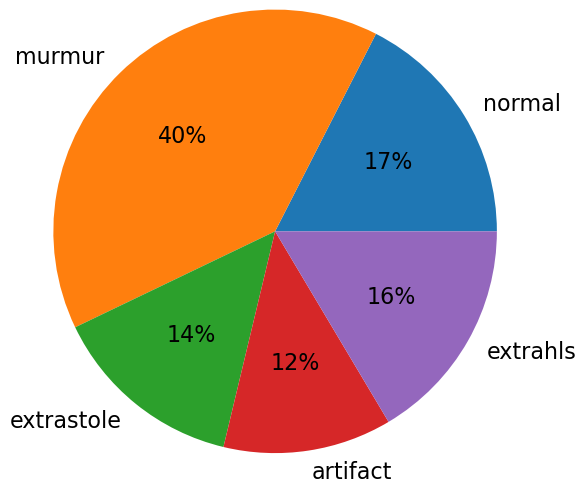

In [138]:

x_1 = np.array([len(os.listdir(N_normal_data)),
              len(os.listdir(N_murmur_data)),
              len(os.listdir(N_extrastole_data)),
              len(os.listdir(N_artifact_data)),
              len(os.listdir(N_extrahls_data))])

labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']

plt.pie(x_1, labels=labels, autopct='%.0f%%', radius=1.5, textprops={'fontsize':16})

In [146]:
noise_normal_audio, noise_normal_sample, noise_normal_path = random_sound(N_normal_data)
noise_murmur_audio, noise_murmrur_sample, noise_murmur_path = random_sound(N_murmur_data)

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


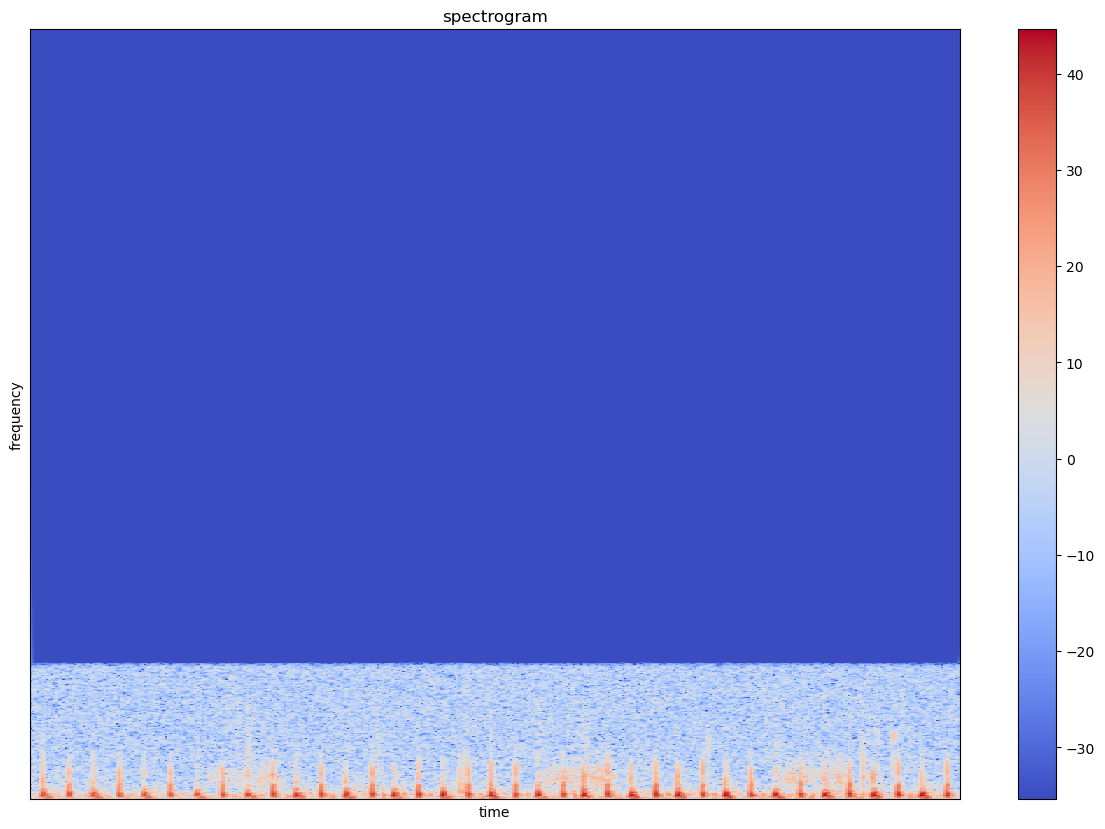

In [145]:
show_spectrogram(noise_normal_sample)

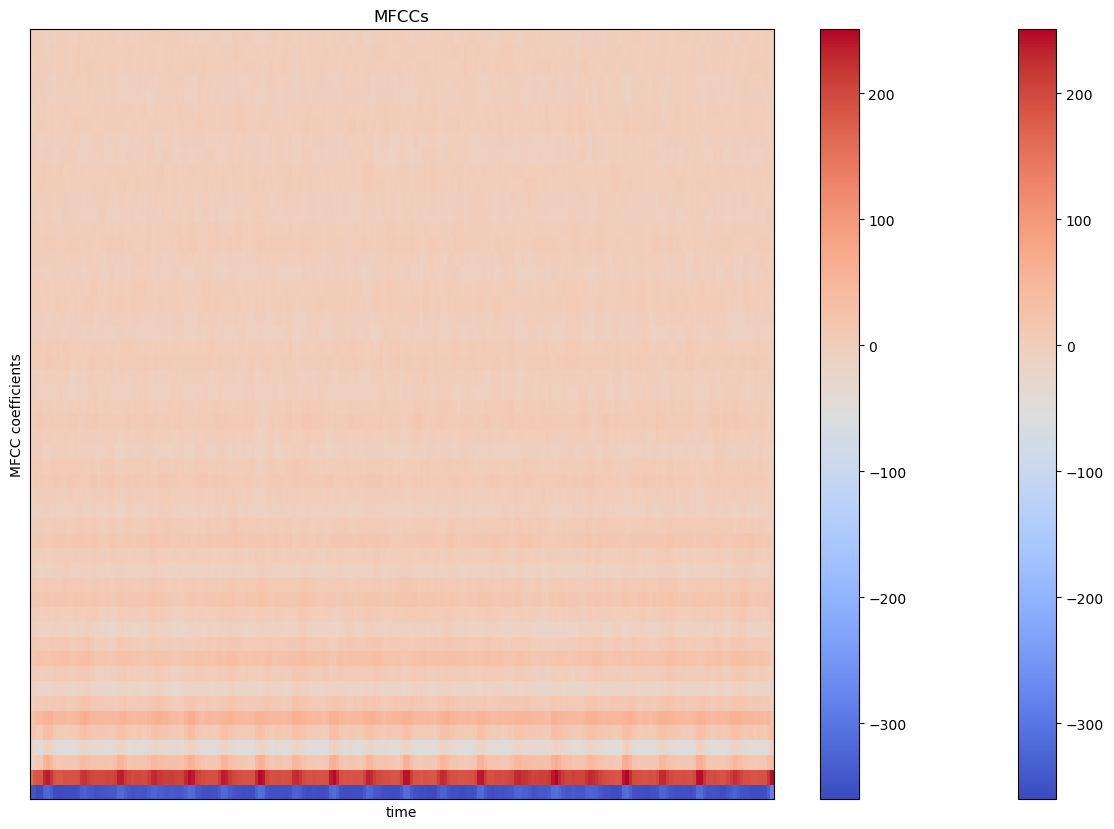

In [148]:
show_mfcc_features(noise_normal_sample)

STFT hop length duration is : 0.023219954648526078
STFT window duration is : 0.09287981859410431


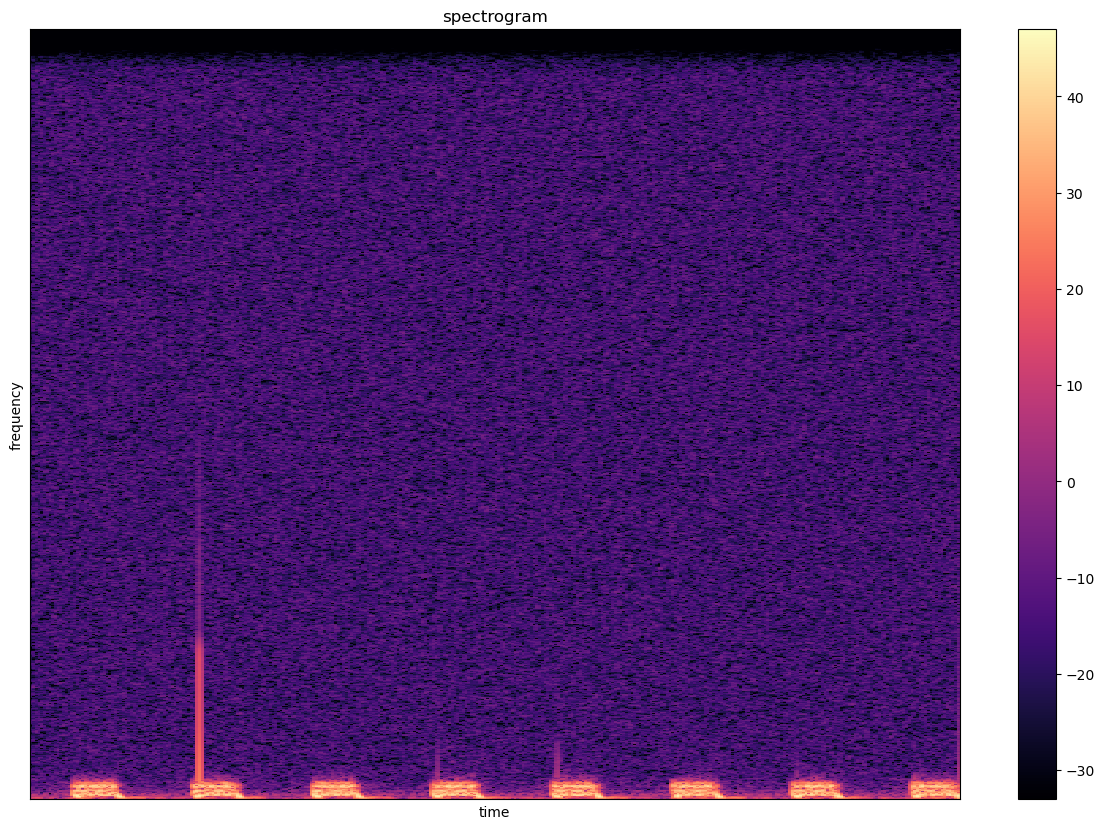

In [147]:
show_spectrogram(noise_murmrur_sample)

In [114]:
SAMPLE_RATE = 22050
MAX_SOUND_CLIP_DURATION = 10 # 10 sec / clip

# Normal files 
normal_files = fnmatch.filter(os.listdir(N_normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=N_normal_data, file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

# Artifact files
artifact_files = fnmatch.filter(os.listdir(N_artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data(folder=N_artifact_data, file_names=artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_sounds]

# Murmur files 
murmur_files = fnmatch.filter(os.listdir(N_murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=N_murmur_data, file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_sounds]

# Extrahls files
extrahls_files = fnmatch.filter(os.listdir(N_extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=N_extrahls_data, file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [4 for items in extrahls_sounds]

# Extrastole files
extrastole_files = fnmatch.filter(os.listdir(N_extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=N_extrastole_data, file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [3 for items in extrastole_sounds]



fixing audio lenght :  normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght :  normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght :  normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght :  normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght :  normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght :  normal_noisynormal_108_1305654420093_A.wav
fixing audio lenght :  normal_noisynormal_109_1305653972028_A.wav
fixing audio lenght :  normal_noisynormal_109_1305653972028_C.wav
fixing audio lenght :  normal_noisynormal_109_1305653972028_E.wav
fixing audio lenght :  normal_noisynormal_110_1305655332337_A.wav
fixing audio lenght :  normal_noisynormal_110_1305655332337_B.wav
fixing audio lenght :  normal_noisynormal_113_1306244002866_A.wav
fixing audio lenght :  normal_noisynormal_113_1306244002866_B.wav
fixing audio lenght :  normal_noisynormal_115_1306259437619_A1.wav
fixing audio lenght :  normal_noisynormal_115_1306259437619_B.wav
fixing au

In [55]:
# unlabel_data files 
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data, file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data, file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]



fixing audio lenght :  Bunlabelledtest__101_1305030823364_F.wav
fixing audio lenght :  Bunlabelledtest__103_1305031931979_A.wav
fixing audio lenght :  Bunlabelledtest__103_1305031931979_C.wav
fixing audio lenght :  Bunlabelledtest__106_1306776721273_B.wav
fixing audio lenght :  Bunlabelledtest__106_1306776721273_D.wav
fixing audio lenght :  Bunlabelledtest__107_1305654946865_B.wav
fixing audio lenght :  Bunlabelledtest__109_1305653972028_B.wav
fixing audio lenght :  Bunlabelledtest__109_1305653972028_D.wav
fixing audio lenght :  Bunlabelledtest__112_1306243000964_C.wav
fixing audio lenght :  Bunlabelledtest__113_1306244002866_C.wav
fixing audio lenght :  Bunlabelledtest__117_1306262456650_B1.wav
fixing audio lenght :  Bunlabelledtest__118_1306262335509_A.wav
fixing audio lenght :  Bunlabelledtest__118_1306262335509_A1.wav
fixing audio lenght :  Bunlabelledtest__118_1306262335509_C2.wav
fixing audio lenght :  Bunlabelledtest__122_1306325762831_A.wav
fixing audio lenght :  Bunlabelledtes

# Concatenation

In [115]:
x_data = np.concatenate((artifact_sounds, normal_sounds, extrahls_sounds, extrastole_sounds, murmur_sounds))
print(x_data, '\n' ,'-'*50)
y_data = np.concatenate((artifact_labels, normal_labels, extrahls_labels, extrastole_labels, murmur_labels))
print(y_data)

test_x = np.concatenate((Aunlabelledtest_sounds, Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels, Bunlabelledtest_labels))

print(f'combined training data record : {len(x_data), len(y_data)}')


[[[-6.0074652e+02]
  [ 3.4831902e+01]
  [ 4.9633837e+00]
  ...
  [ 1.0523252e-01]
  [ 6.3821703e-02]
  [ 3.1315601e-01]]

 [[-6.3715961e+02]
  [ 3.7073994e+01]
  [ 5.4396677e+00]
  ...
  [ 5.1780432e-02]
  [-8.6837150e-02]
  [ 1.2082416e-01]]

 [[-6.4293469e+02]
  [ 4.2911625e+01]
  [ 3.2587461e+00]
  ...
  [-2.1651382e-02]
  [ 1.4440654e-01]
  [ 4.1880292e-01]]

 ...

 [[-4.8439233e+02]
  [ 2.8142233e+01]
  [ 5.0292845e+00]
  ...
  [ 3.0396074e-01]
  [ 2.0628543e-01]
  [-2.9438025e-01]]

 [[-5.0667776e+02]
  [ 2.7361940e+01]
  [ 5.3030305e+00]
  ...
  [ 3.1291246e-01]
  [ 2.3343538e-01]
  [-2.3431049e-01]]

 [[-5.1135889e+02]
  [ 2.8449568e+01]
  [ 5.4555717e+00]
  ...
  [ 2.7844292e-01]
  [ 1.5871714e-01]
  [-4.0027434e-01]]] 
 --------------------------------------------------
[0 0 0 ... 1 1 1]
combined training data record : (10740, 10740)


# Data Split    

In [116]:
x_train , x_test, y_trian, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=4, shuffle=True)
x_train , x_val, y_trian, y_val = train_test_split(x_train, y_trian, train_size=0.9, random_state=4, shuffle=True)

# One-hot Encoding

y_trian =  np.array(tf.keras.utils.to_categorical(y_trian, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y = np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

# Imbalanced Data

In [120]:
TRAIN_IMG_COUNT = 3580
COUNT_0 = 440    # artifact
COUNT_1 = 1419   # murmur
COUNT_2 = 626   # normal
COUNT_3 = 506    
COUNT_4 = 586
# W =  all_img_train / (N * number_img)

weight_for_0 = TRAIN_IMG_COUNT / (5 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (5 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (5 * COUNT_2)
weight_for_3 = TRAIN_IMG_COUNT / (5 * COUNT_3)
weight_for_4 = TRAIN_IMG_COUNT / (5 * COUNT_4)
class_weight = {0 : weight_for_0, 1 : weight_for_1 , 2 : weight_for_2 , weight_for_3 : 3, weight_for_4 : 4}
class_weight

{0: 1.6272727272727272,
 1: 0.5045806906272022,
 2: 1.1437699680511182,
 1.4150197628458498: 3,
 1.2218430034129693: 4}

In [117]:
# class weight

#TRAIN_IMG_COUNT = 578
#COUNT_0 = 40    # artifact
#COUNT_1 = 129   # murmur
#COUNT_2 = 409   # normal
#COUNT_3 = 46    
#COUNT_4 = 19
## W =  all_img_train / (N * number_img)
#
#weight_for_0 = TRAIN_IMG_COUNT / (5 * COUNT_0)
#weight_for_1 = TRAIN_IMG_COUNT / (5 * COUNT_1)
#weight_for_2 = TRAIN_IMG_COUNT / (5 * COUNT_2)
#weight_for_3 = TRAIN_IMG_COUNT / (5 * COUNT_3)
#weight_for_4 = TRAIN_IMG_COUNT / (5 * COUNT_4)
#class_weight = {0 : weight_for_0, 1 : weight_for_1 , 2 : weight_for_2}
#class_weight

{0: 2.89, 1: 0.896124031007752, 2: 0.282640586797066}

# LSTM Model

In [121]:
x_train_lstm = x_train
x_val_lstm = x_test
x_test_lstm = x_val 

y_trian_lstm = y_trian
y_val_lstm = y_test
y_test_lstm = y_val

In [122]:
print(len(x_train_lstm), len(y_trian_lstm))
print(len(x_test), len(y_test))
print(len(x_val), len(y_val))

7732 7732
2148 2148
860 860


# Build Model

In [123]:
lstm_model = tf.keras.models.Sequential()

lstm_model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
lstm_model.add(BatchNormalization())

lstm_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
lstm_model.add(BatchNormalization())

lstm_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
lstm_model.add(BatchNormalization())

lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(128))

lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.3))

lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.3))

lstm_model.add(Dense(5, activation='softmax'))
lstm_model.summary()

c:\Users\markereversey\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 52, 1024)       │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 26, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 26, 512)        │     2,621,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 13, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 13, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 13, 256)        │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 7, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,630,085 (13.85 MB)

 Trainable params: 3,626,501 (13.83 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [124]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
lstm_model.compile(optimizer=optimiser, 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

cb = [EarlyStopping(patience=15, monitor='val_accuracy', mode='max', 
                    restore_best_weights=True), 
                    ModelCheckpoint('./checkpoint/lstm_cnn.keras', save_best_only=True)]


# Train Model

In [125]:
callbacks = [ 
    TensorBoard(log_dir='./logs')
]
history = lstm_model.fit(x_train_lstm, y_trian_lstm,
                         validation_data=(x_val_lstm, y_val_lstm),
                         batch_size = 8, 
                         epochs=150,
                         class_weight=class_weight,
                         callbacks= cb)

Epoch 1/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.4662 - loss: 1.0611 - val_accuracy: 0.7514 - val_loss: 0.6596
Epoch 2/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.6806 - loss: 0.6516 - val_accuracy: 0.7537 - val_loss: 0.5921
Epoch 3/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.7136 - loss: 0.5426 - val_accuracy: 0.7537 - val_loss: 0.5624
Epoch 4/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.7376 - loss: 0.5072 - val_accuracy: 0.7132 - val_loss: 0.6510
Epoch 5/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.7436 - loss: 0.4739 - val_accuracy: 0.7630 - val_loss: 0.5354
Epoch 6/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 64s 66ms/step - accuracy: 0.7742 - loss: 0.4292 - val_accuracy: 0.7849 - val_loss: 0.4928
Epoch 7/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.7918 - loss: 0.4116 - val_accuracy: 0.7346 - val_loss: 0.9322
Epoch 8/150
967/967 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.8012 - loss: 0

# Evaluate Model

In [126]:
lstm_model.evaluate(x_val_lstm, y_val_lstm)

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9921 - loss: 0.0207


[0.03049357421696186, 0.9906890392303467]

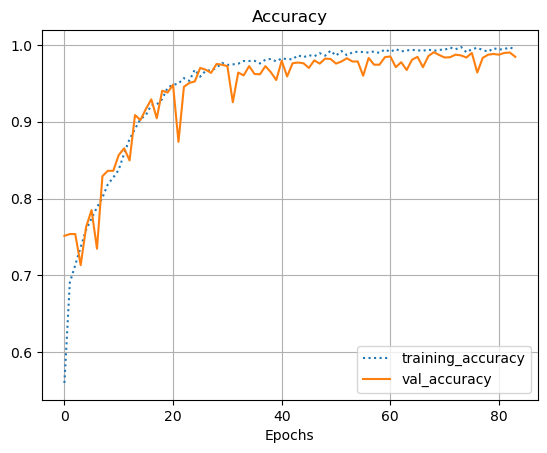

In [127]:
def plot_loss_curves (history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))


    plt.figure()
    plt.grid()
    plt.plot(epochs, accuracy, label='training_accuracy', linestyle='dotted')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

plot_loss_curves(history)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


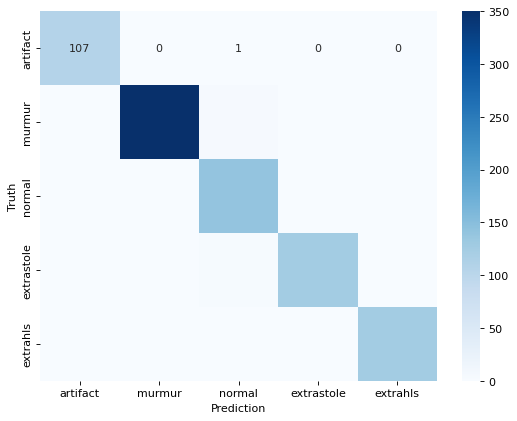

In [128]:
classes = ['artifact', 'murmur', 'normal', 'extrastole', 'extrahls']

preds = lstm_model.predict(x_test_lstm)
classpreds = [np.argmax(t) for t in preds]
y_testclass = [np.argmax(t) for t in y_test_lstm]
cm = confusion_matrix(y_testclass, classpreds)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [129]:
cm

array([[107,   0,   1,   0,   0],
       [  0, 350,   5,   1,   0],
       [  0,   0, 140,   0,   0],
       [  0,   0,   3, 126,   0],
       [  0,   0,   0,   0, 127]], dtype=int64)

In [130]:
print(classification_report(y_testclass, classpreds, target_names=classes))

              precision    recall  f1-score   support

    artifact       1.00      0.99      1.00       108
      murmur       1.00      0.98      0.99       356
      normal       0.94      1.00      0.97       140
  extrastole       0.99      0.98      0.98       129
    extrahls       1.00      1.00      1.00       127

    accuracy                           0.99       860
   macro avg       0.99      0.99      0.99       860
weighted avg       0.99      0.99      0.99       860



# Prediction

In [135]:
def heart_prediction (file_path, duration=10, sr=22050):
    classes = ['artifact', 'murmur', 'normal']
    input_length = sr * duration

    X, sr = librosa.load(file_path, sr=sr, duration=duration)
    dur = librosa.get_duration(y=X, sr=sr)

    if (round(dur) < duration):
        X = librosa.util.fix_length(X, size=input_length)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=52, n_fft=512, hop_length=2048).T, axis=0)
    mfccs = mfccs.reshape(1, mfccs.shape[0], 1)
    preds = lstm_model.predict(mfccs)

    preds_class_index = np.argmax(preds)
    preds_class = classes[preds_class_index]
    confidence = preds[0, preds_class_index]

    return preds_class, confidence


In [136]:
#unlabel_path
#normal_path
#murmur_path
heart_prediction(file_path=unlabel_path,
                 duration=10,
                 sr=22050)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


('murmur', 0.99999976)

# Analytics

# FFT (Fast Fouier Transform)

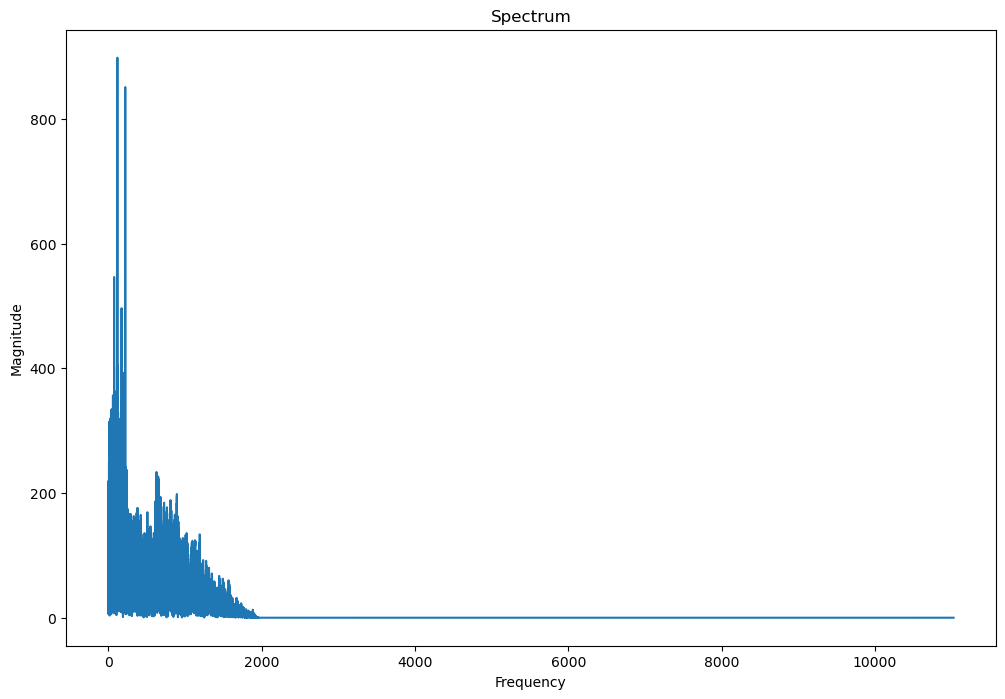

In [33]:
show_audio_spectrum(normal_sample)

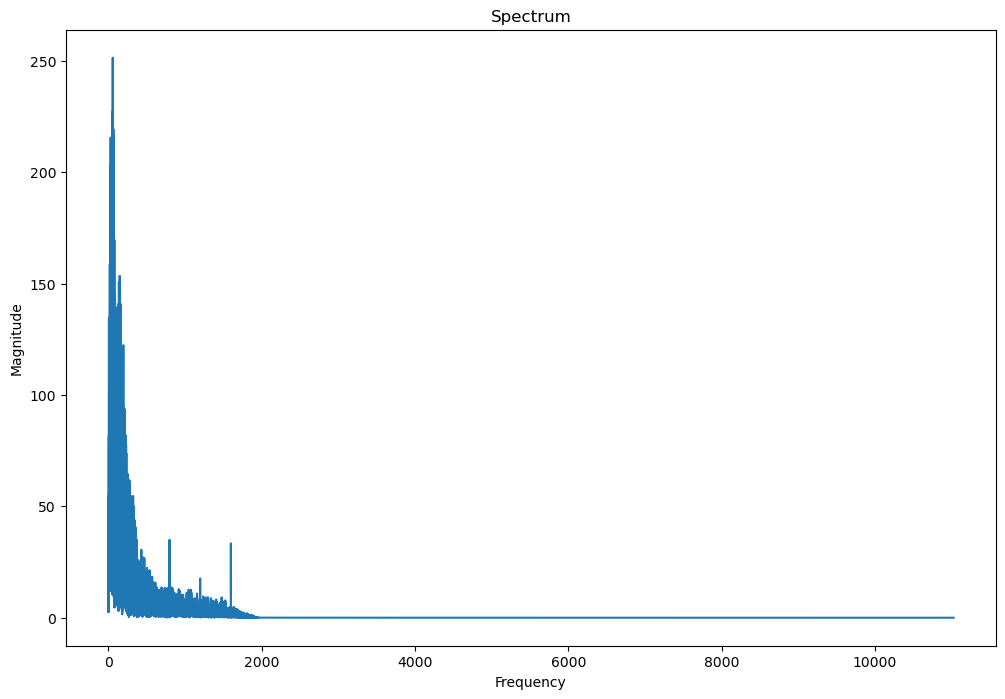

In [34]:
show_audio_spectrum(murmur_sample)